In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Data Loading Visualization

Sample of loaded contributions data:


,user_id,valid_from,valid_to,osm_type,osm_id,osm_version,contrib_type,members,status,changeset,...,xmax,ymin,ymax,centroid,quadkey_z10,h3_r5,geometry_type,geometry_valid,geometry,vandalism
0,2377515,2014-10-06 23:59:31,2525-01-01,way,way/306274324,2,DELETED,None,deleted,"{'editor': 'iD 1.5.4', 'hashtags': [], 'id': 2...",...,-62.976084,-84.906653,-84.906087,"{'x': -63.00606307447101, 'y': -84.9061737972215}",2323223122,603185502329241599,InvalidGeometry,False,"POLYGON ((-62.9969414 -84.90658619999999, -62....",True
1,2377515,2014-10-06 23:59:31,2525-01-01,way,way/306274325,2,DELETED,None,deleted,"{'editor': 'iD 1.5.4', 'hashtags': [], 'id': 2...",...,-62.956141,-84.906658,-84.905873,"{'x': -63.02389380624011, 'y': -84.90541275705...",2323223122,603185502329241599,InvalidGeometry,False,"POLYGON ((-62.9729527 -84.9058725, -62.9757816...",True
2,6335199,2017-12-19 01:47:30,2525-01-01,way,way/508546101,3,DELETED,None,deleted,"{'editor': 'iD 2.5.1', 'hashtags': [], 'id': 5...",...,-90.207543,38.520176,38.525163,"{'x': -90.20805486920308, 'y': 38.52402543148942}",0231113113,599651674105053183,InvalidGeometry,False,"POLYGON ((-90.20804009999999 38.5251629, -90.2...",True
3,5193146,2018-01-27 20:06:23,2525-01-01,way,way/470020391,6,DELETED,None,deleted,"{'editor': 'JOSM/1.5 (13265 es)', 'hashtags': ...",...,-0.898112,41.655704,41.659127,"{'x': -0.9040472730470975, 'y': 41.65753419208...",0313333303,599989239207165951,InvalidGeometry,False,"POLYGON ((-0.9073251 41.658674399999995, -0.90...",True
4,3149129,2015-12-11 19:43:11,2525-01-01,way,way/383928694,2,DELETED,None,deleted,"{'editor': 'JOSM/1.5 (8969 pt_BR)', 'hashtags'...",...,-34.881410,-8.043162,-8.043102,"{'x': -34.88146198953866, 'y': -8.043138886726...",2110031320,601257186567389183,InvalidGeometry,False,"POLYGON ((-34.8814103 -8.0431621, -34.8815028 ...",True


Summary statistics of the dataset:


,user_id,valid_from,valid_to,osm_version,area,area_delta,length,length_delta,xmin,xmax,ymin,ymax,h3_r5
count,1.000000e+02,100,100,100.000000,100.0,100.00000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,1.228975e+06,2017-06-08 11:26:12.670000,2525-01-01 00:00:00,4.010000,0.0,-1201.71000,0.0,-21120.540000,34.449796,34.557212,-6.148694,-6.036272,6.010563e+17
min,3.689400e+04,2014-02-16 04:01:11,2525-01-01 00:00:00,2.000000,0.0,-60560.00000,0.0,-276620.000000,-122.380084,-122.377614,-89.999998,-89.999998,5.991287e+17
25%,8.790750e+04,2015-04-04 07:09:10.250000,2525-01-01 00:00:00,2.000000,0.0,-1.00000,0.0,-27370.500000,5.367603,5.403988,-84.906654,-84.905926,5.996781e+17
50%,1.452310e+05,2017-11-28 16:54:00,2525-01-01 00:00:00,2.000000,0.0,0.00000,0.0,-2686.500000,29.836023,29.836074,22.653267,22.921006,6.001361e+17
75%,1.975220e+06,2018-12-15 12:20:34,2525-01-01 00:00:00,4.000000,0.0,0.00000,0.0,0.000000,106.452822,106.704382,36.213636,36.304415,6.031855e+17
max,9.391846e+06,2019-11-10 13:11:11,2525-01-01 00:00:00,58.000000,0.0,0.00000,0.0,0.000000,151.105189,151.108817,63.638500,63.817000,6.032462e+17
std,1.934675e+06,NaN,NaN,6.147176,0.0,6600.05925,0.0,44651.160458,73.560769,73.613050,54.616742,54.689074,1.516422e+15


Distribution of target variable (vandalism):


vandalism
False    67
True     33
Name: count, dtype: int64

<Axes: title={'center': 'Vandalism Distribution'}, xlabel='Vandalism', ylabel='Count'>

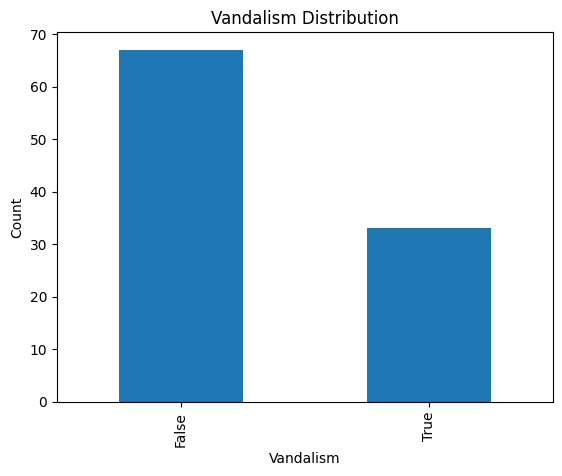

In [25]:
import pandas as pd

from config import VISUALIZATION_DATA_PATH

# Load saved data sample from data loading step
data_loading_sample_path = VISUALIZATION_DATA_PATH['data_loading']
contributions_df = pd.read_parquet(data_loading_sample_path)

# Visualize the data
print("Sample of loaded contributions data:")
display(contributions_df.head())

print("Summary statistics of the dataset:")
display(contributions_df.describe())

print("Distribution of target variable (vandalism):")
vandalism_counts = contributions_df['vandalism'].value_counts()
display(vandalism_counts)

# Plot distribution of target variable
vandalism_counts.plot(kind='bar', title='Vandalism Distribution', xlabel='Vandalism', ylabel='Count')


2. Feature Engineering Visualization

In [26]:
# Load saved data sample from feature engineering step
feature_engineering_sample_path = VISUALIZATION_DATA_PATH['feature_engineering']
features_df = pd.read_parquet(feature_engineering_sample_path)

# Visualize the features
print("Sample of extracted features:")
display(features_df.head())

print("Summary statistics of the features:")
display(features_df.describe())


Sample of extracted features:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,editor_used,area_delta,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
0,2377515,0.0,0.0,0.0,0.0,0.0,0.0,0.001848,iD 1.5.4,-597,...,0,0,0,0,0,0,0,0,0,True
1,2377515,0.0,0.0,0.0,0.0,0.0,0.0,0.001848,iD 1.5.4,-661,...,0,0,0,0,0,0,0,0,0,True
2,6335199,0.0,0.0,0.0,0.0,0.0,0.0,0.000924,iD 2.5.1,-6351,...,0,0,0,0,0,1,0,0,0,True
3,5193146,0.0,0.0,0.0,0.0,0.0,0.0,0.000462,JOSM,-60560,...,0,0,0,0,0,0,1,0,0,True
4,3149129,0.0,0.0,0.0,0.0,0.0,0.0,0.000924,JOSM,-47,...,0,0,0,0,0,0,0,0,0,True


Summary statistics of the features:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,craft,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military
count,1.000000e+02,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.0,100.00,100.0,100.00,100.000000,100.0,100.000000,100.000000,100.0,100.0
mean,1.228975e+06,0.0,0.0,0.0,0.000167,0.028167,0.014110,0.007321,-1201.71000,-21120.540000,...,0.0,0.01,0.0,0.01,0.140000,0.0,0.060000,0.070000,0.0,0.0
std,1.934675e+06,0.0,0.0,0.0,0.001667,0.053171,0.026147,0.006705,6600.05925,44651.160458,...,0.0,0.10,0.0,0.10,0.348735,0.0,0.238683,0.256432,0.0,0.0
min,3.689400e+04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000462,-60560.00000,-276620.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0
25%,8.790750e+04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001386,-1.00000,-27370.500000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0
50%,1.452310e+05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.004157,0.00000,-2686.500000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0
75%,1.975220e+06,0.0,0.0,0.0,0.000000,0.000000,0.002740,0.010624,0.00000,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0
max,9.391846e+06,0.0,0.0,0.0,0.016667,0.127778,0.063014,0.017552,0.00000,0.000000,...,0.0,1.00,0.0,1.00,1.000000,0.0,1.000000,1.000000,0.0,0.0


3. Preprocessing Visualization

Sample of preprocessed feature data (X):


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,continent_South America,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
0,56597,0.0,0.0,0.0,0.0,0.127778,0.063014,0.017552,0,-3796,...,0,True,True,False,True,True,False,False,False,True
1,902727,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003233,0,-1179,...,0,True,True,False,True,True,False,False,False,True
2,902727,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003233,0,-552,...,0,True,True,False,True,True,False,False,True,False
3,8072086,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007390,0,-1021,...,0,True,True,False,True,True,False,False,False,True
4,606974,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000924,0,-2839,...,1,True,True,False,True,True,False,True,False,False


Sample of preprocessed target data (y):


,vandalism
0,False
1,True
2,True
3,False
4,True


Distribution of target variable (preprocessed):


vandalism
True         56
False        44
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='Count'>

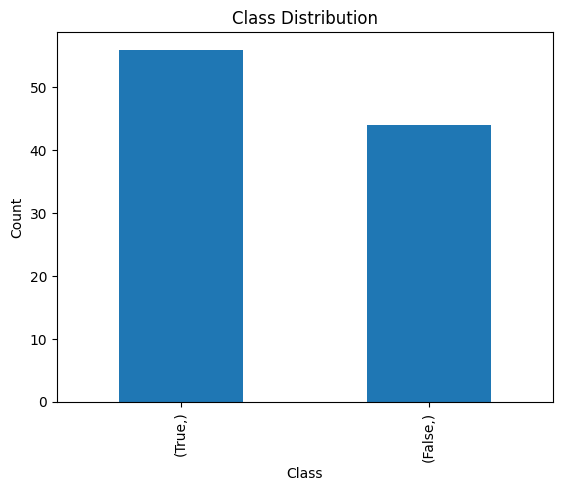

In [27]:
# Load saved data samples from preprocessing step
preprocessing_X_sample_path = VISUALIZATION_DATA_PATH['preprocessing_X']
preprocessing_y_sample_path = VISUALIZATION_DATA_PATH['preprocessing_y']

X_encoded = pd.read_parquet(preprocessing_X_sample_path)
y = pd.read_parquet(preprocessing_y_sample_path)

# Visualize the preprocessed features
print("Sample of preprocessed feature data (X):")
display(X_encoded.head())

print("Sample of preprocessed target data (y):")
display(y.head())

# Check class imbalance in target data
class_distribution = y.value_counts()
print("Distribution of target variable (preprocessed):")
display(class_distribution)

# Plot class distribution
class_distribution.plot(kind='bar', title='Class Distribution', xlabel='Class', ylabel='Count')


4. Data Splitting Visualization

In [28]:
# Load saved data sample from data splitting step
X_train = pd.read_parquet(VISUALIZATION_DATA_PATH['data_splitting_X_train'])
X_val = pd.read_parquet(VISUALIZATION_DATA_PATH['data_splitting_X_val'])
X_test = pd.read_parquet(VISUALIZATION_DATA_PATH['data_splitting_X_test'])

# Assuming y_train, y_val, y_test are not saved; recreate splits using loaded samples if needed
# Visualize data splits
print("Sample of X_train:")
display(X_train.head())

print("Sample of X_val:")
display(X_val.head())

print("Sample of X_test:")
display(X_test.head())

# Print the shapes of train, validation, and test datasets (if shapes were logged previously)
print("Shapes of datasets:")
shapes = {
    'X_train': X_train.shape,
    'X_val': X_val.shape,  # Uncomment if loaded
    'X_test': X_test.shape,  # Uncomment if loaded
    # 'y_train': y_train.shape,  # Uncomment if loaded
    # 'y_val': y_val.shape,  # Uncomment if loaded
    # 'y_test': y_test.shape,  # Uncomment if loaded
}
shapes_df = pd.DataFrame.from_dict(shapes, orient='index', columns=['Rows', 'Columns'])
display(shapes_df)


Sample of X_train:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,continent_South America,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
249,9375460,0.0,0.0,0.0,0.0,0.005556,0.002740,0.000462,0,-668,...,0,True,True,False,True,True,False,True,False,False
335,3392,0.0,0.0,0.0,0.0,0.000000,0.008219,0.026790,0,-1132,...,0,True,True,False,True,True,False,True,False,False
934,145231,0.0,0.0,0.0,0.0,0.000000,0.000000,0.010624,-1,0,...,0,True,True,True,False,True,True,False,False,False
485,2738296,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000924,-20674,0,...,0,True,True,True,False,True,False,False,True,False
656,2700471,0.0,0.0,0.0,0.0,0.000000,0.000000,0.012933,0,-3055,...,0,True,True,False,True,True,True,False,False,False


Sample of X_val:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,continent_South America,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
769,617226,0.0,0.0,0.0,0.0,0.0,0.00000,0.013395,0,-1497,...,0,True,True,False,True,True,True,False,False,False
887,1975220,0.0,0.0,0.0,0.0,0.0,0.00000,0.003233,0,-33369,...,0,True,True,False,True,True,False,False,False,True
364,6447498,0.0,0.0,0.0,0.0,0.0,0.00000,0.003695,0,-7516,...,0,True,True,False,True,True,False,False,False,True
308,1799626,0.0,0.0,0.0,0.0,0.0,0.00274,0.003695,0,-32,...,1,True,True,False,True,True,False,False,False,True
82,7445592,0.0,0.0,0.0,0.0,0.0,0.00000,0.006928,0,-648,...,0,True,True,False,True,True,False,False,True,False


Sample of X_test:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,continent_South America,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
6,2570784,0.0,0.0,0.0,0.0,0.0,0.000000,0.005543,0,-1469,...,0,True,True,False,True,True,True,False,False,False
156,3392,0.0,0.0,0.0,0.0,0.0,0.008219,0.026790,0,-1281,...,0,True,True,False,True,True,False,False,True,False
956,30521,0.0,0.0,0.0,0.0,0.0,0.000000,0.006005,0,-606,...,0,True,True,False,True,True,False,False,False,True
928,3392,0.0,0.0,0.0,0.0,0.0,0.008219,0.026790,0,-813,...,0,True,True,False,True,True,False,True,False,False
543,307202,0.0,0.0,0.0,0.0,0.0,0.000000,0.005081,0,-1748,...,0,True,True,False,True,True,False,False,False,True


Shapes of datasets:


,Rows,Columns
X_train,100,198
X_val,80,198
X_test,100,198



2024-11-24 02:59:02 - INFO - clustering.py -- Clustered data loaded successfully.


Data after adding clustering labels:

Sample of X_train:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,cluster_label
249,9375460,0.0,0.0,0.0,0.0,0.005556,0.002740,0.000462,0,-668,...,True,True,False,True,True,False,True,False,False,65
335,3392,0.0,0.0,0.0,0.0,0.000000,0.008219,0.026790,0,-1132,...,True,True,False,True,True,False,True,False,False,15
934,145231,0.0,0.0,0.0,0.0,0.000000,0.000000,0.010624,-1,0,...,True,True,True,False,True,True,False,False,False,4
485,2738296,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000924,-20674,0,...,True,True,True,False,True,False,False,True,False,56
656,2700471,0.0,0.0,0.0,0.0,0.000000,0.000000,0.012933,0,-3055,...,True,True,False,True,True,True,False,False,False,0


Sample of X_val:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,cluster_label
769,617226,0.0,0.0,0.0,0.0,0.0,0.00000,0.013395,0,-1497,...,True,True,False,True,True,True,False,False,False,2
887,1975220,0.0,0.0,0.0,0.0,0.0,0.00000,0.003233,0,-33369,...,True,True,False,True,True,False,False,False,True,20
364,6447498,0.0,0.0,0.0,0.0,0.0,0.00000,0.003695,0,-7516,...,True,True,False,True,True,False,False,False,True,63
308,1799626,0.0,0.0,0.0,0.0,0.0,0.00274,0.003695,0,-32,...,True,True,False,True,True,False,False,False,True,3
82,7445592,0.0,0.0,0.0,0.0,0.0,0.00000,0.006928,0,-648,...,True,True,False,True,True,False,False,True,False,46


Sample of X_test:


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,area_delta,length_delta,...,osm_type_way,contribution_type_DELETED,geometry_type_InvalidGeometry,geometry_type_LineString,edit_frequency_of_osm_element_rarely_edited,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,cluster_label
6,2570784,0.0,0.0,0.0,0.0,0.0,0.000000,0.005543,0,-1469,...,True,True,False,True,True,True,False,False,False,24
156,3392,0.0,0.0,0.0,0.0,0.0,0.008219,0.026790,0,-1281,...,True,True,False,True,True,False,False,True,False,15
956,30521,0.0,0.0,0.0,0.0,0.0,0.000000,0.006005,0,-606,...,True,True,False,True,True,False,False,False,True,92
928,3392,0.0,0.0,0.0,0.0,0.0,0.008219,0.026790,0,-813,...,True,True,False,True,True,False,True,False,False,15
543,307202,0.0,0.0,0.0,0.0,0.0,0.000000,0.005081,0,-1748,...,True,True,False,True,True,False,False,False,True,76



2024-11-24 02:59:02 - INFO - clustering.py -- Clustered data loaded successfully.

2024-11-24 02:59:02 - INFO - clustering.py -- Visualizing clustering results...


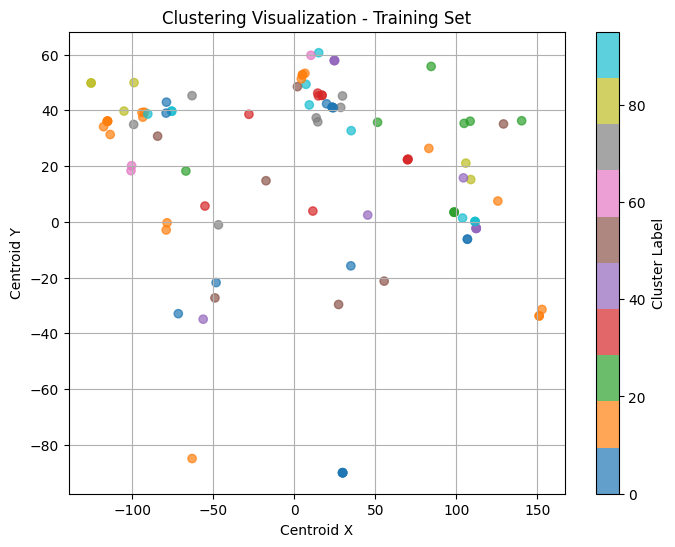

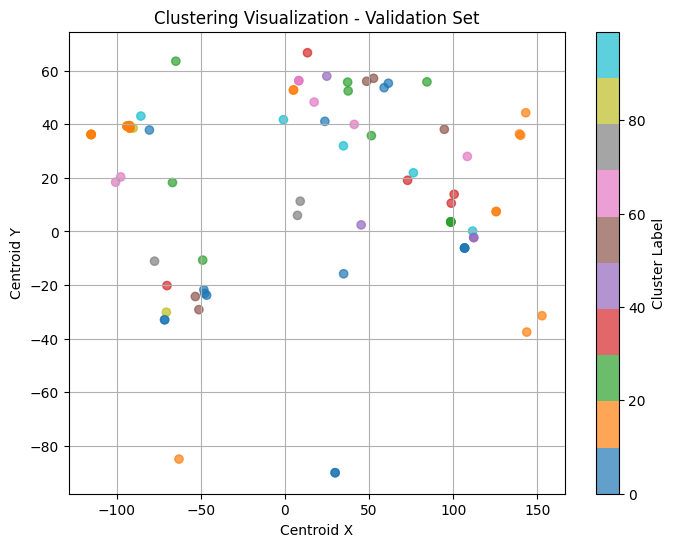

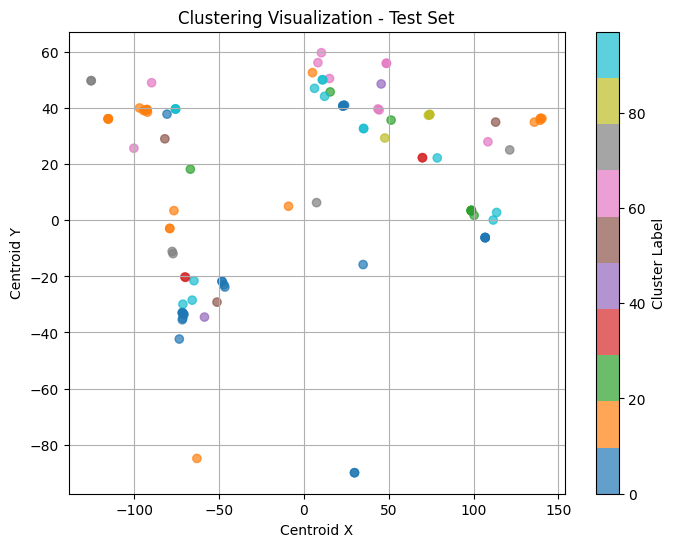

In [29]:
# Notebook Code to Visualize Clustering
from src.clustering import visualize_clustering, load_clustered_data

X_train, X_val, X_test = load_clustered_data()

print("Data after adding clustering labels:\n")
print("Sample of X_train:")
display(X_train.head())

print("Sample of X_val:")
display(X_val.head())

print("Sample of X_test:")
display(X_test.head())

# Visualize the clustering results
visualize_clustering()

Confusion Matrix:


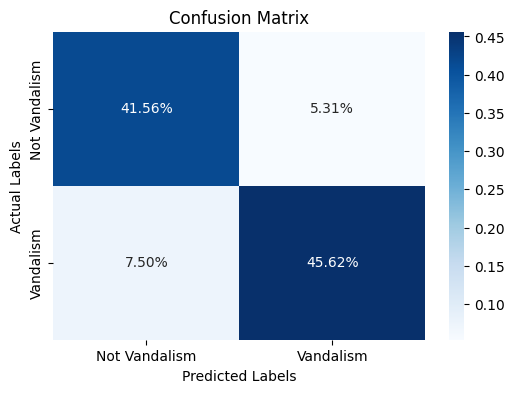

ROC and Precision-Recall Curves:


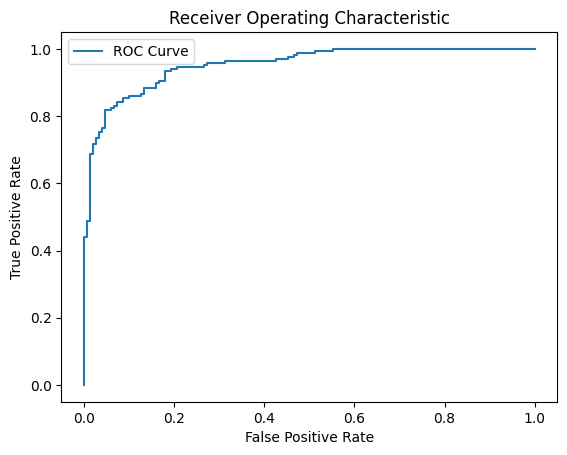

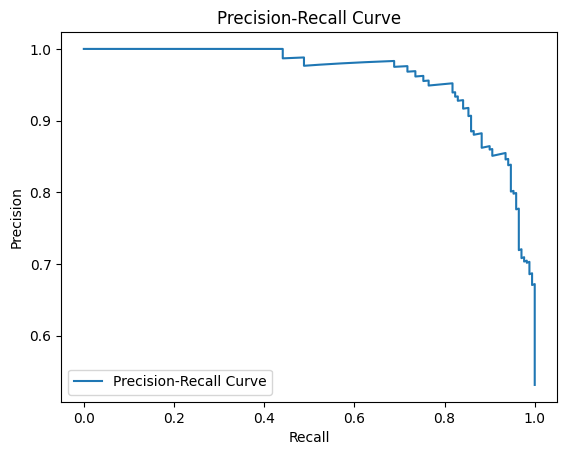

In [30]:
# Import evaluation functions
from evaluation import plot_confusion_matrix, plot_roc_pr_curves

# Display the confusion matrix
print("Confusion Matrix:")
plot_confusion_matrix()

# Plot ROC and Precision-Recall curves
print("ROC and Precision-Recall Curves:")
plot_roc_pr_curves()


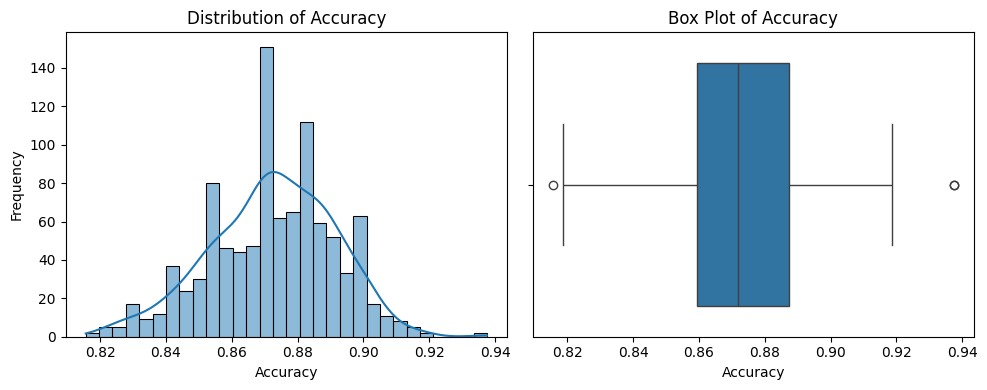

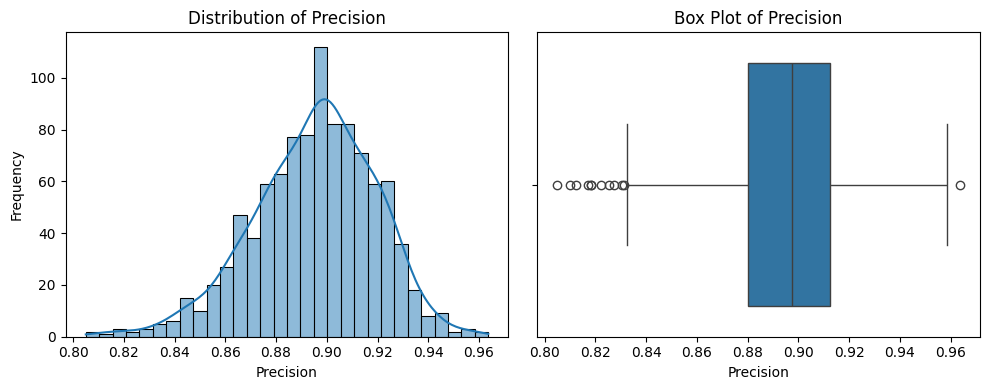

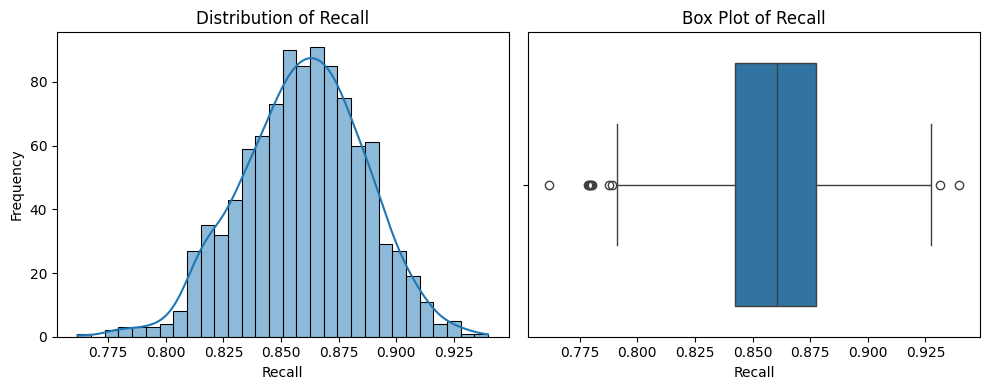

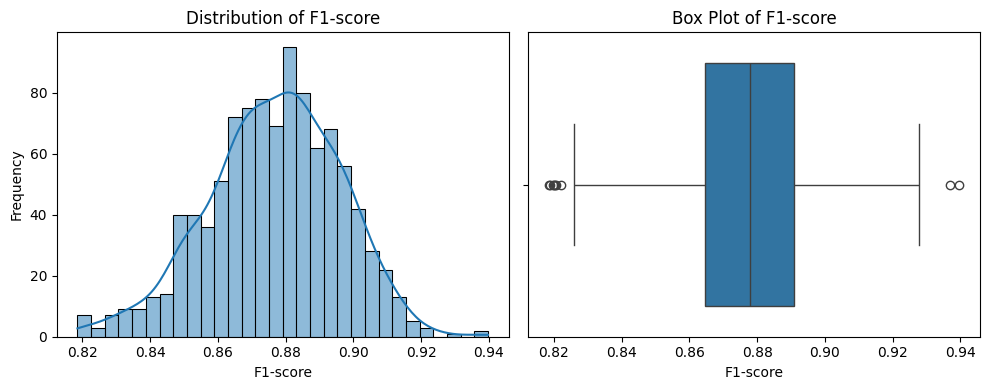

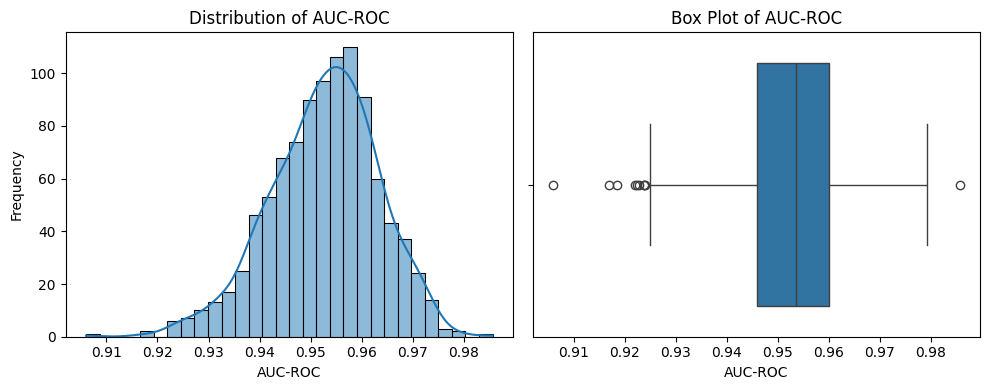

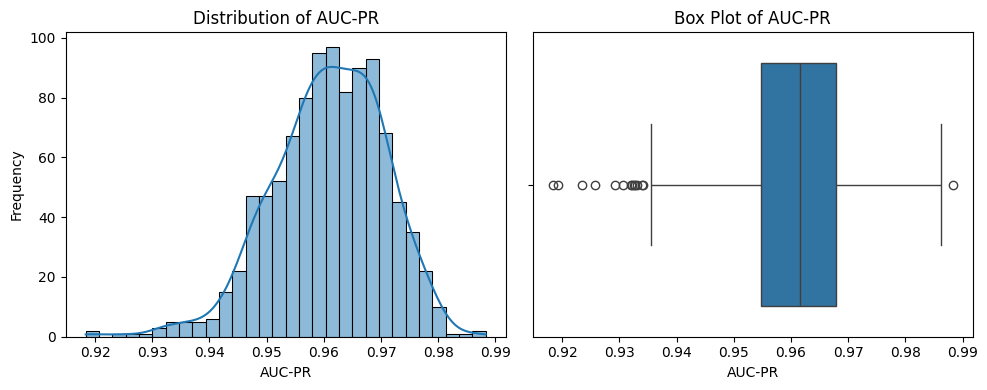

In [31]:
import config
import os
# In your Jupyter Notebook
import pandas as pd
from src.bootstrap_evaluation import plot_metric_distributions

# Load bootstrap metrics
metrics_df = pd.read_csv(os.path.join(config.BOOTSTRAP_RESULTS_DIR, 'bootstrap_test_set_metrics_all_iterations.csv'))

# Plot distributions
plot_metric_distributions(metrics_df)


In [32]:
# In your Jupyter Notebook
import pandas as pd

# Continent Evaluation Results
continent_results_path = os.path.join(config.GEOGRAPHICAL_RESULTS_DIR, 'continent_evaluation_results.csv')
continent_stats_df = pd.read_csv(continent_results_path)
print("\nStatistics Table for Each Continent:")
display(continent_stats_df)

# Country Evaluation Results
country_results_path = os.path.join(config.GEOGRAPHICAL_RESULTS_DIR, 'country_evaluation_results.csv')
country_stats_df = pd.read_csv(country_results_path)
print("\nStatistics Table for Each Country:")
display(country_stats_df)



Statistics Table for Each Continent:


,Continent Name,Total Samples,Total Correct Predictions,Total Incorrect Predictions,True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN),Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,Africa,19,13,6,7,6,2,4,0.684211,0.777778,0.636364,0.700000,0.795455,0.824005
1,Antarctica,8,8,0,1,7,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Asia,69,63,6,19,44,2,4,0.913043,0.904762,0.826087,0.863636,0.957467,0.940736
3,Europe,83,71,12,27,44,4,8,0.855422,0.870968,0.771429,0.818182,0.954167,0.947418
4,North America,78,70,8,51,19,3,5,0.897436,0.944444,0.910714,0.927273,0.949675,0.981892
5,Oceania,7,6,1,6,0,1,0,0.857143,0.857143,1.000000,0.923077,1.000000,1.000000
6,Other,38,36,2,23,13,1,1,0.947368,0.958333,0.958333,0.958333,0.994048,0.996795
7,South America,49,41,8,21,20,4,4,0.836735,0.840000,0.840000,0.840000,0.933333,0.928839



Statistics Table for Each Country:


,Country Name,Total Samples,Total Correct Predictions,Total Incorrect Predictions,True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN),Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,ARG,3,3,0,0,3,0,0,1.000000,0.000000,0.000000,0.000000,Not defined (single class),Not defined (single class)
1,AUS,7,6,1,6,0,1,0,0.857143,0.857143,1.000000,0.923077,1.0,1.0
2,BEL,1,0,1,0,0,0,1,0.000000,0.000000,0.000000,0.000000,Not defined (single class),Not defined (single class)
3,BLZ,2,1,1,1,0,0,1,0.500000,1.000000,0.500000,0.666667,Not defined (single class),Not defined (single class)
4,BOL,1,1,0,0,1,0,0,1.000000,0.000000,0.000000,0.000000,Not defined (single class),Not defined (single class)
5,BRA,18,15,3,1,14,0,3,0.833333,1.000000,0.250000,0.400000,0.9821428571428572,0.95
6,CAN,7,6,1,1,5,0,1,0.857143,1.000000,0.500000,0.666667,1.0,1.0
7,CHL,18,16,2,16,0,2,0,0.888889,0.888889,1.000000,0.941176,0.625,0.9510128250017957
8,CHN,10,10,0,0,10,0,0,1.000000,0.000000,0.000000,0.000000,Not defined (single class),Not defined (single class)
9,CMR,1,1,0,0,1,0,0,1.000000,0.000000,0.000000,0.000000,Not defined (single class),Not defined (single class)
